# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#importando os dados
df = pd.read_csv("Profissao- Cientista de Dados_M10_support material.csv")

#removendo colunas Unnamed e index
df_1 = df.loc[:,df.columns[1:]].drop(columns='index')
df_1

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2016-03-01,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,2016-03-01,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,2016-03-01,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,2016-03-01,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

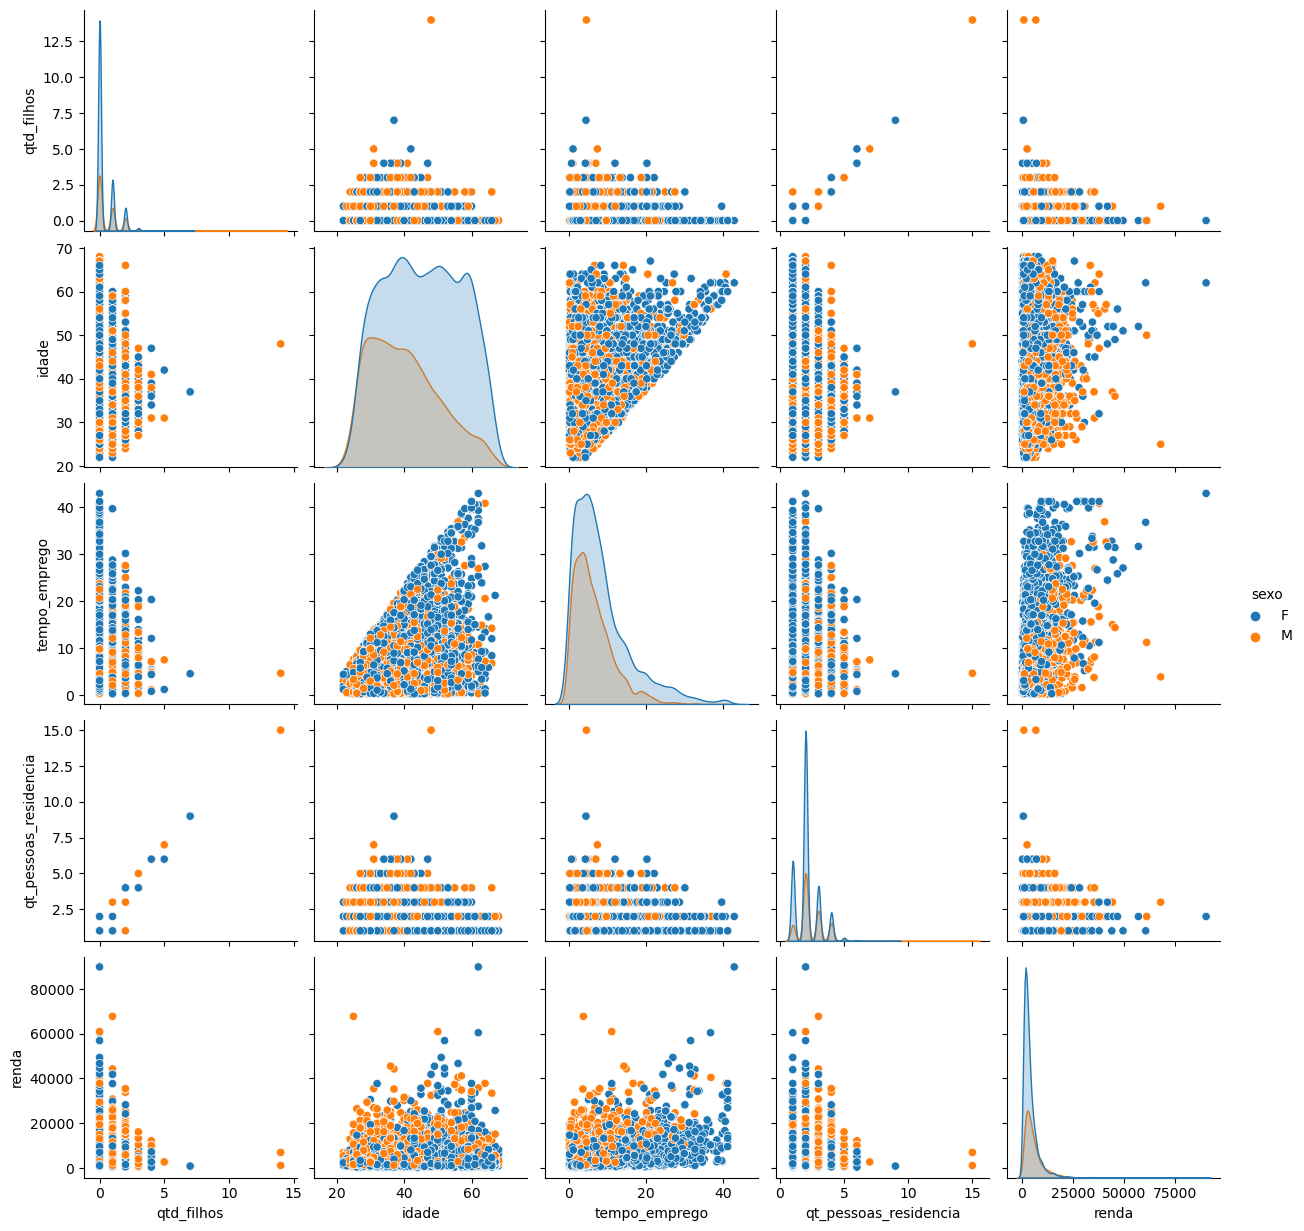

In [2]:
plt.close()

numericas = list(df_1.select_dtypes('number'))

sns.pairplot(df_1, hue='sexo', vars=numericas, height=2.5)

plt.show()

In [3]:
df_1[numericas].corr().sort_values('renda', ascending=False)

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
renda,0.009567,0.042570,0.394235,0.020977,1.000000
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567


As variáveis renda, quantidade de pessoas na residência e quantidade de filhos parecem apresentar outliers. Há uma correlação lógica entre idade e tempo de emprego devido à questão da maioridade, apesar da matriz de correlação não mostrar isso de forma tão clara (correlação de 0.323934)

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

<Axes: xlabel='tempo_emprego', ylabel='renda'>

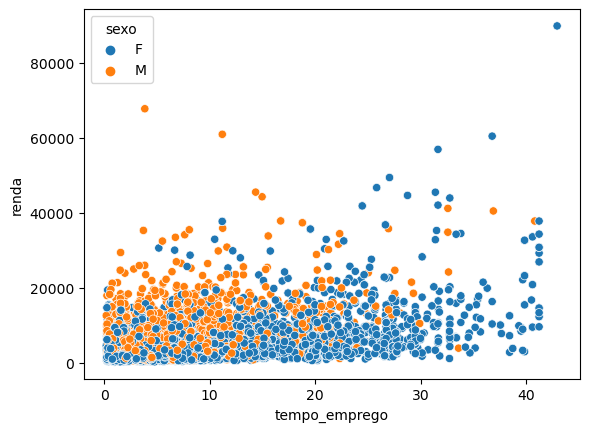

In [4]:
sns.scatterplot(data=df_1, x='tempo_emprego', y='renda', hue='sexo')

<Axes: xlabel='idade', ylabel='renda'>

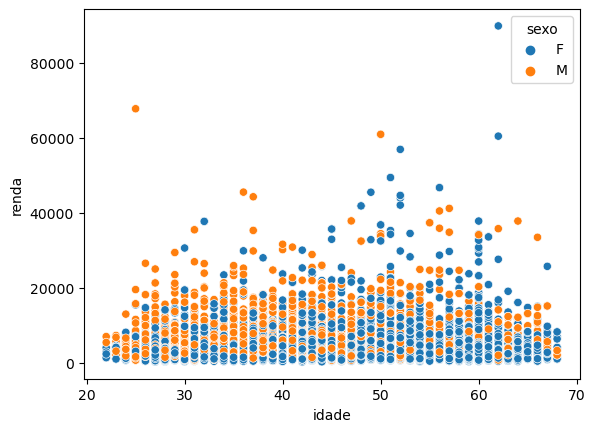

In [5]:
sns.scatterplot(data=df_1, x='idade', y='renda', hue='sexo')

Novamente, a questão da maioridade impede que alguem com menos de 30 anos tenha mais de 10 anos de tempo de emprego

3) Na su aopinião, há outliers na variável renda?

<Axes: ylabel='renda'>

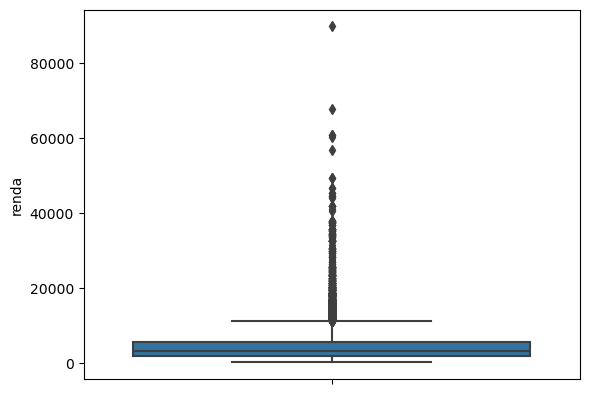

In [6]:
sns.boxplot(df_1, y='renda')

O gráfico acima mostra forte presença de outliers na variável renda

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [7]:
df_2 = df_1.copy()
df_2['renda'] = np.log(df_2['renda'])

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

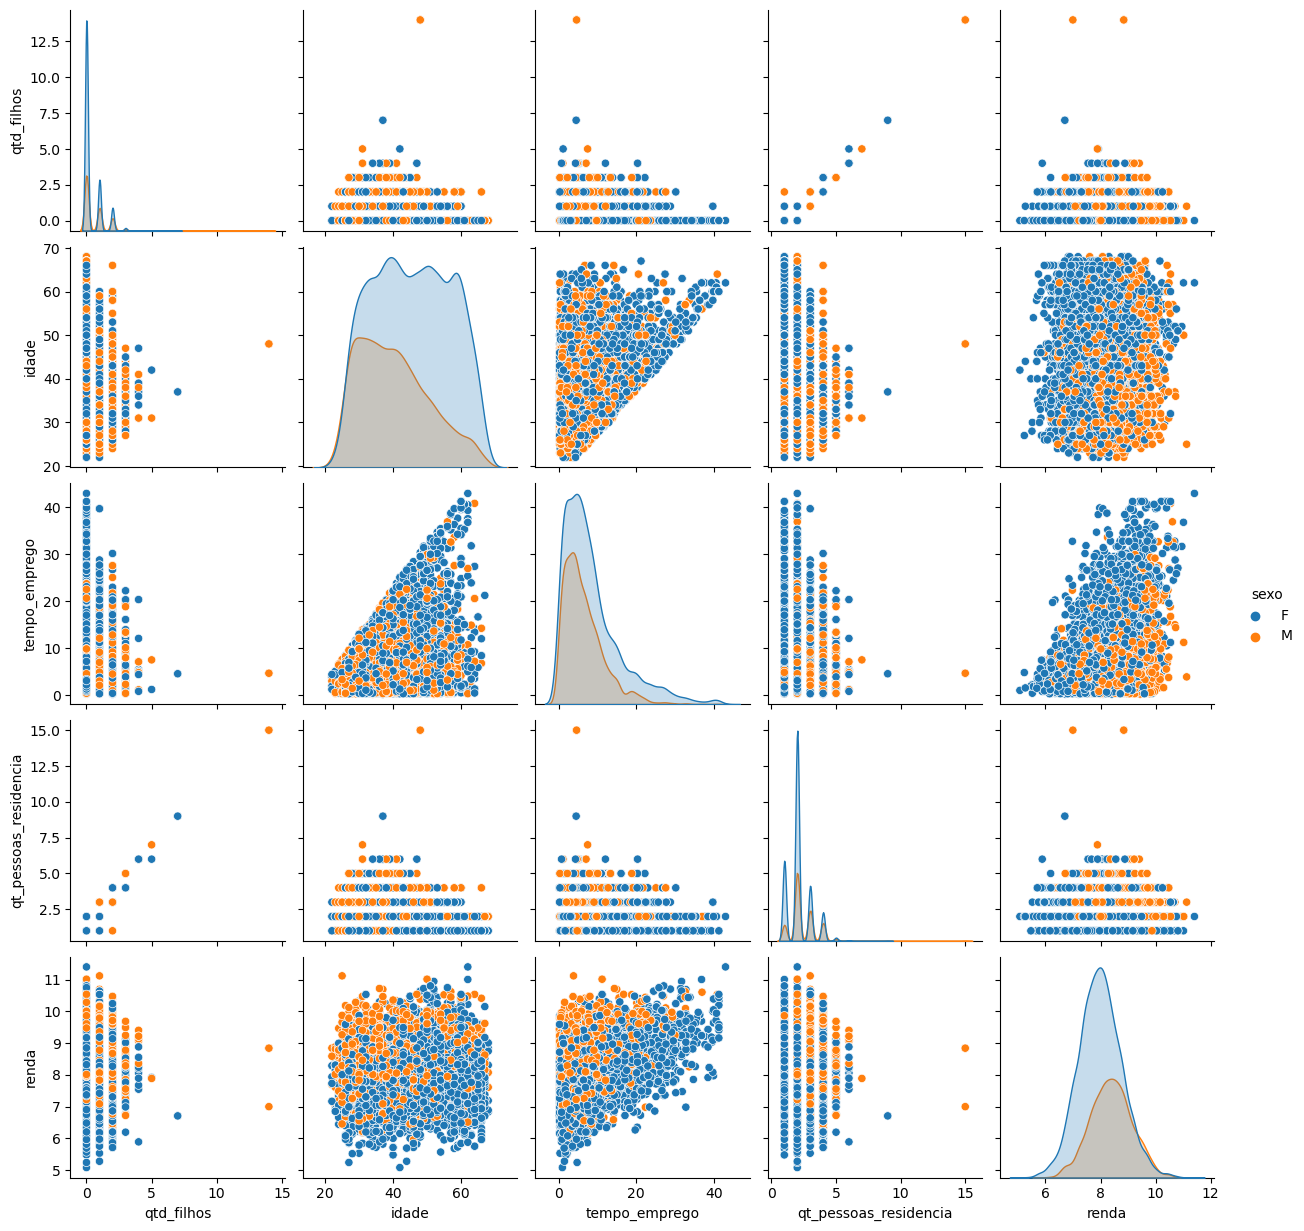

In [8]:
plt.close()

numericas = list(df_2.select_dtypes('number'))

sns.pairplot(df_2, hue='sexo', vars=numericas, height=2.5)

plt.show()

In [9]:
df_2[numericas].corr().sort_values('renda', ascending=False)

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
renda,0.023743,0.024712,0.379556,0.036267,1.000000
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.379556
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.036267
idade,-0.364303,1.000000,0.323934,-0.338805,0.024712
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.023743


<Axes: xlabel='tempo_emprego', ylabel='renda'>

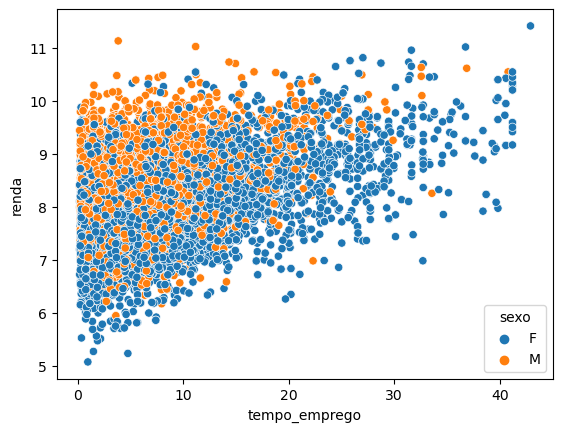

In [10]:
sns.scatterplot(data=df_2, x='tempo_emprego', y='renda', hue='sexo')

<Axes: xlabel='qt_pessoas_residencia', ylabel='renda'>

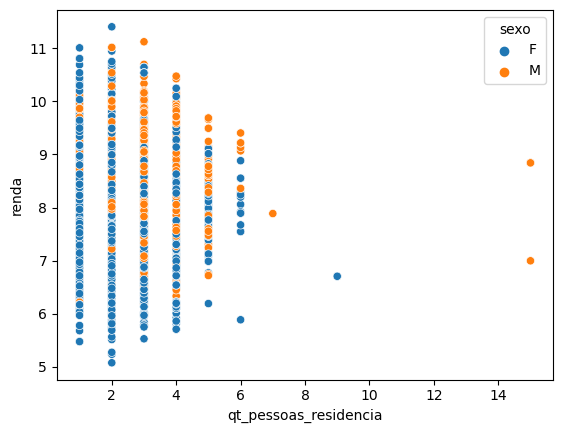

In [11]:
sns.scatterplot(data=df_2, x='qt_pessoas_residencia', y='renda', hue='sexo')

<Axes: ylabel='renda'>

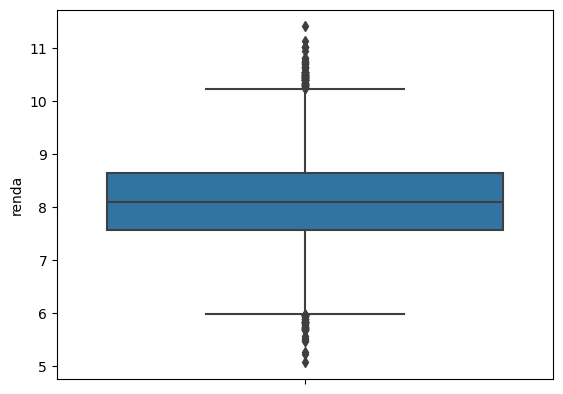

In [12]:
sns.boxplot(df_2, y='renda')

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Minha impressão é de que a aplicação do LOG melhorou a análise, pois parece haver uma melhor distribuição dos dados na variável renda menor sobreposição nos gráficos, permitindo melhores análises. Todavia, modificou a correlação de algumas variáveis, alterando as análises dos gráficos de dispersão, que parecem mostrar uma correlação entre solidão e renda (poucas pessoas em casa)